<h1>Data Science And Business Analytics Task 2</h1>
<h1>Title: TASK2: PREDICTION USING UNSUPERVISED LEARNING</h1>
<h1>Author: Piyush Kumar Singh</h1>

<h3>Importing necessary Libraries</h3>

In [1]:
#Importing necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets 
from sklearn.cluster import KMeans
#Ignoring Warnings
import warnings as wg
wg.filterwarnings("ignore")

<h3>Storing the Dataset in df</h3>

In [2]:
#Read Dataset
df = pd.read_csv('Iris.csv')

In [3]:
#Displaying only 5 rows just to view the csv 
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Checking Shape to determine the number of rows and coloumns 
df.shape

(150, 6)

In [5]:
#Displaying the names of the coloumns 
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
#Dsiplaying the unique Species (because our target is to make cluster upon the Species)
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
#Dropping the label because our problem statement is for Unsupervised Learning Problem 
new_df = df
new_df = new_df.drop(columns=["Species","Id"])
new_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<h3>Applying elbow method</h3>

In [10]:
within_cluster_sum_of_square = []
cluster_range = range(1,15)
for k in cluster_range:
    km = KMeans(n_clusters=k)
    km = km.fit(new_df)
    within_cluster_sum_of_square.append(km.inertia_)

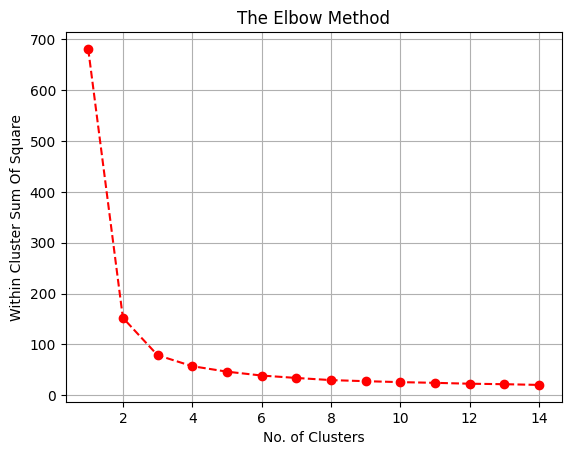

In [11]:
plt.plot(cluster_range,within_cluster_sum_of_square,color='red', marker='o', linestyle='dashed')
plt.title("The Elbow Method")
plt.xlabel("No. of Clusters")
plt.ylabel("Within Cluster Sum Of Square")
plt.grid()
plt.show()

<h3>We can see that the optimum number of clusters are 3</h3>

In [12]:
model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
predictions = model.fit_predict(new_df)

<h3>Visual Representation: </h3>

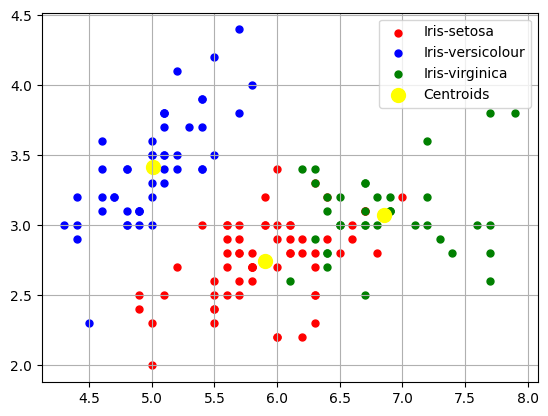

In [13]:
x = new_df.iloc[:, [0, 1, 2, 3]].values
plt.scatter(x[predictions == 0, 0], x[predictions == 0, 1], s = 25, c = 'red', label = 'Iris-setosa')
plt.scatter(x[predictions == 1, 0], x[predictions == 1, 1], s = 25, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[predictions == 2, 0], x[predictions == 2, 1], s = 25, c = 'green', label = 'Iris-virginica')

#Plotting cluster centroids
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.grid()
plt.legend()
plt.show()

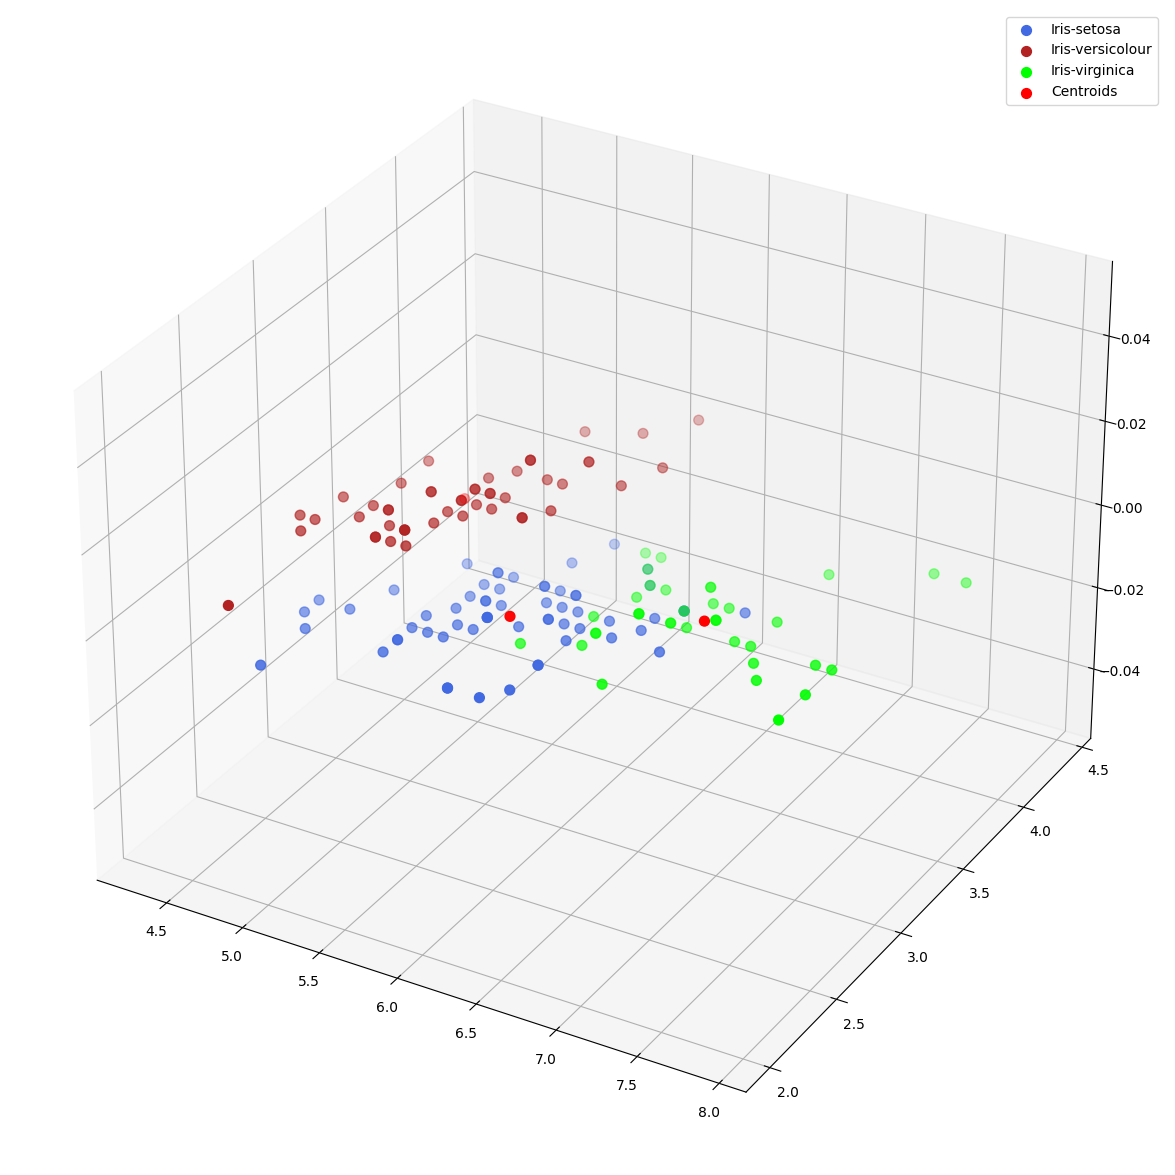

In [14]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[predictions == 0, 0], x[predictions == 0, 1], s = 50, c = 'royalblue', label = 'Iris-setosa')
plt.scatter(x[predictions == 1, 0], x[predictions == 1, 1], s = 50, c = 'firebrick', label = 'Iris-versicolour')
plt.scatter(x[predictions == 2, 0], x[predictions == 2, 1], s = 50, c = 'lime', label = 'Iris-virginica')


plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], s = 50, c = 'red', label = 'Centroids')
plt.legend()
plt.show()

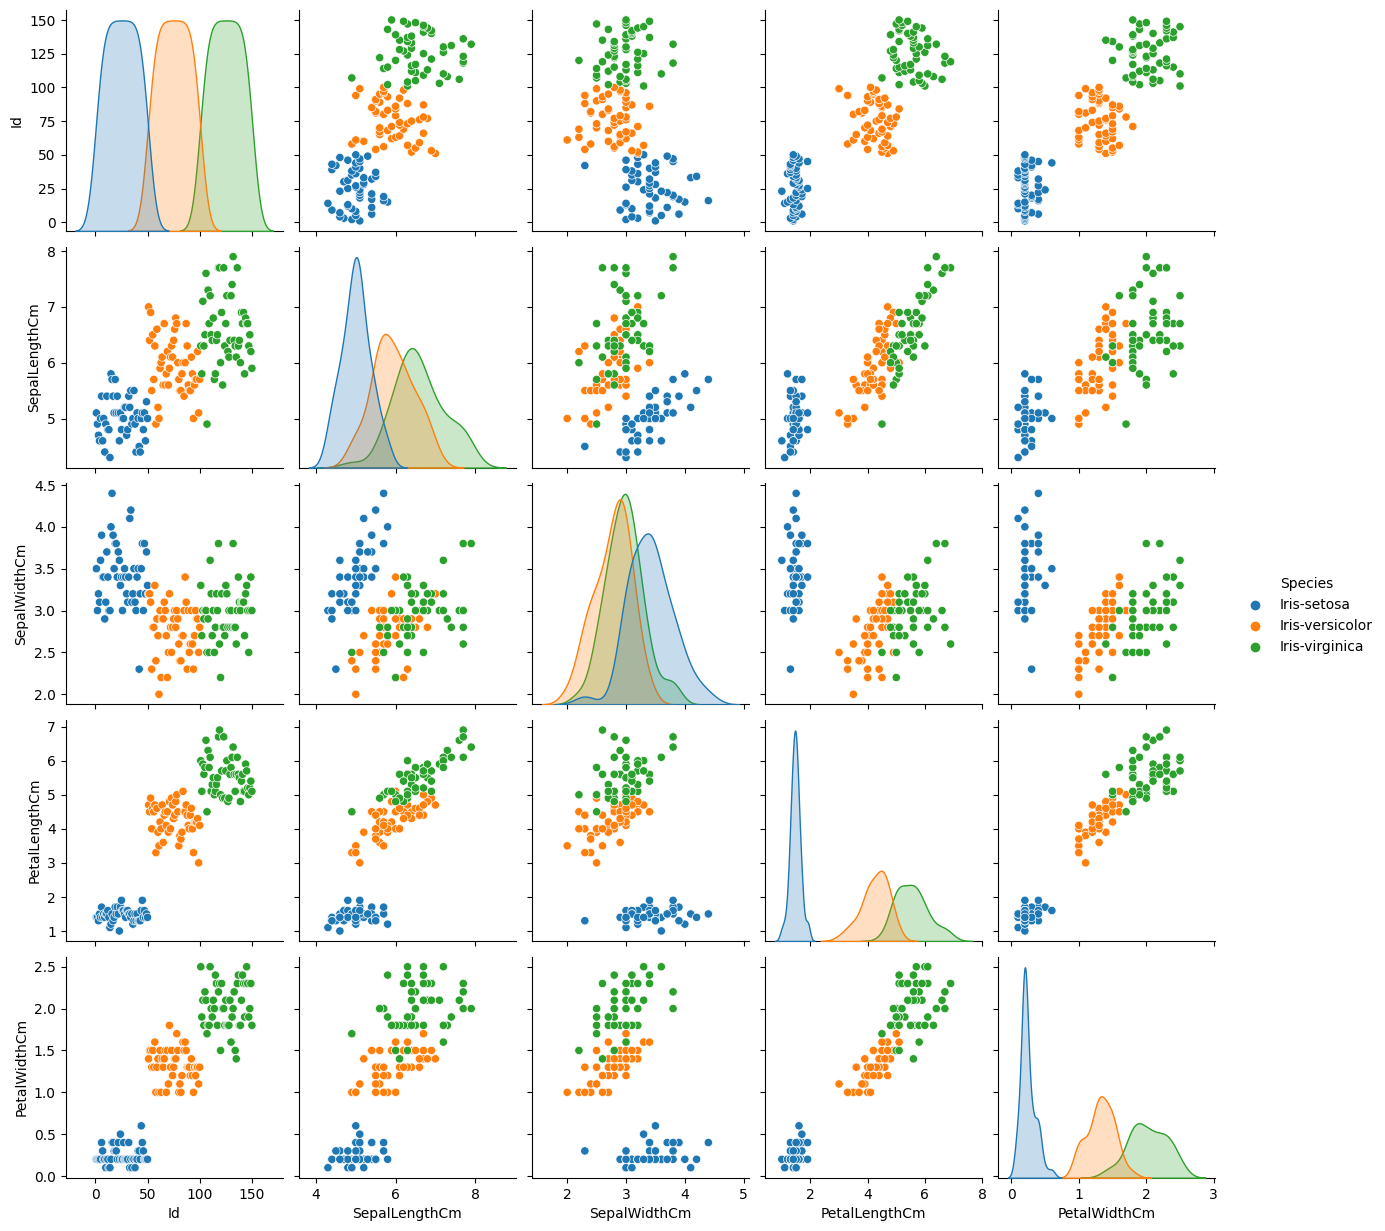

In [15]:
sns.pairplot(df,hue="Species")